# Linear Regression for Multi-Variable

In exercise folder (same level as this notebook on github) there is `hiring.csv`. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to **build a machine learning model** for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates.

Get results for those inputs
1. **2 yr experience, 9 test score, 6 interview score**
2. **12 yr experience, 10 test score, 10 interview score**

#### Content Table
* [Import Libraries](#Import-Libraries)
* [Read Data](#Read-Data)
* [Data Visualization](#Data-Visualization)
* [Train Model](#Train-Model)
* [Predict Targets](#Predict-Targets)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from word2number import w2n

### Read Data

In [2]:
data = pd.read_csv('hiring.csv')
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
data['test_score(out of 10)'].fillna(round(data['test_score(out of 10)'].mean(),0),inplace=True)

In [4]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [5]:
data.experience.fillna('zero',inplace=True)

In [6]:
data.experience = data.experience.apply(w2n.word_to_num)

In [7]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


### Data Visualization

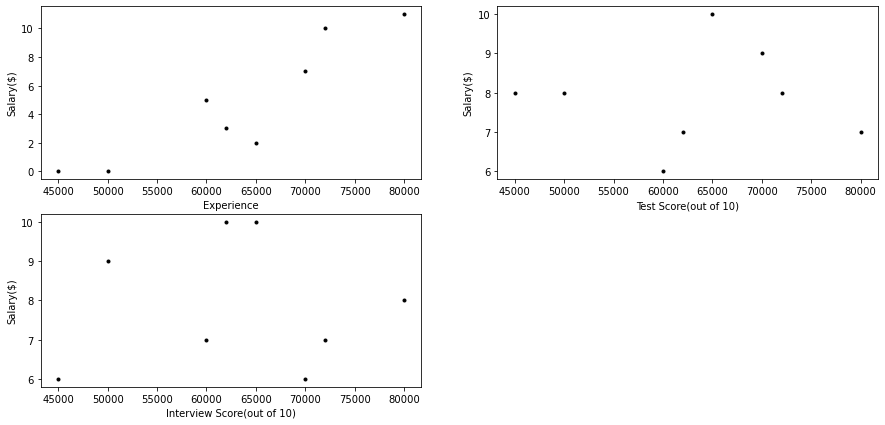

In [8]:
plt.figure(figsize=(15,7))

plt.subplot(221)
plt.xlabel('Experience')
plt.ylabel('Salary($)')
plt.scatter(data['salary($)'],data['experience'],color='black',marker='.')

plt.subplot(222)
plt.xlabel('Test Score(out of 10)')
plt.ylabel('Salary($)')
plt.scatter(data['salary($)'],data['test_score(out of 10)'],color='black',marker='.')

plt.subplot(223)
plt.xlabel('Interview Score(out of 10)')
plt.ylabel('Salary($)')
plt.scatter(data['salary($)'],data['interview_score(out of 10)'],color='black',marker='.')

### Train Model

In [9]:
X = data[['experience','test_score(out of 10)','interview_score(out of 10)']]
y = data['salary($)']

In [10]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [11]:
print('m = ',model.coef_)

m =  [2812.95487627 1845.70596798 2205.24017467]


In [12]:
print('b = ',model.intercept_)

b =  17737.26346433768


In [13]:
print('Accuracy = ',model.score(X,y) * 100,'%')

Accuracy =  96.1678000257796 %


### Predict Targets

In [14]:
print('2 yr experience, 9 test score, 6 interview score = ',model.predict([[2,9,6]])[0],'$')

2 yr experience, 9 test score, 6 interview score =  53205.96797671032 $


In [15]:
print('12 yr experience, 10 test score, 10 interview score = ',model.predict([[12,10,10]])[0],'$')

12 yr experience, 10 test score, 10 interview score =  92002.18340611355 $
